# Virtual River: hydraulic module

<img src="images/rivercare_logo.jpg">

This notebook contains the interface to the Virtual River hydraulic module. The Virtual River is a serious game developed within the RiverCare research programme. This notebook requires a Python 3.6 kernel with ipywidgets version 0.7 or higher. The hydraulic module is build with the "Dotter model" developed by Deltares.

### Contact 
* R.J. den Haan (r.j.denhaan@utwente.nl) (Virtual River)
* K.D. Berends (k.d.berends@utwente.nl) (Hydraulic module)


In [32]:
%matplotlib notebook
from ipywidgets import interact, interactive, interact_manual, IntSlider, Layout, VBox, HBox, interactive_output
from dotter.models import DotterModel
from dotter import utils
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

# Setting up the system

We load the river system from Dotter configuration files. Additionally, we need a list of sections and a covariance matrix that describes the relative input of each section on the roughness at locations along the river.


In [16]:
# Load configuration files
vr = DotterModel('../cases/virtualriver/config.ini')
#vr.dash()


2018-01-15 20:29:41 - models.py - INFO - Loading configuration file ../cases/virtualriver/config.ini
2018-01-15 20:29:41 - models.py - INFO - Loading geometry from ../cases/virtualriver/VirtualRiver.xlsx
2018-01-15 20:29:41 - containers.py - DEBUG - number of timesteps: 182
2018-01-15 20:29:41 - containers.py - DEBUG - start time: 2016-01-01 00:00:00
2018-01-15 20:29:41 - containers.py - DEBUG - top time: 2016-12-30 00:00:00
2018-01-15 20:29:41 - containers.py - DEBUG - using spatial step of 100.0 m
2018-01-15 20:29:42 - models.py - INFO - Loading boundary conditions
2018-01-15 20:29:42 - containers.py - DEBUG - Lateral of factor: 1.06 input at x: 150
2018-01-15 20:29:42 - containers.py - DEBUG - Lateral of factor: 1.2 input at x: 910
2018-01-15 20:29:42 - containers.py - DEBUG - Lateral of factor: 1.43 input at x: 1590
2018-01-15 20:29:42 - models.py - DEBUG - events: []
2018-01-15 20:29:42 - models.py - INFO - Building friction matrix
2018-01-15 20:29:42 - models.py - INFO - set outp

Cov. matrx.

In [21]:
# Covariance matrix
CV = np.loadtxt('../cases/virtualriver/covariance_matrix.csv', delimiter=',')
SECTIONS = np.array([0.03] * 20)


Next, we define a function that calls and plots the system, given the relative roughness of each section:


In [27]:
vr.run(timesteps=[vr.grid.time[0]])
BASELINE = vr.output.waterlevel.iloc[0, :].copy()

2018-01-15 20:32:32 - models.py - INFO - start model run
100%|██████████| 1/1 [00:00<00:00, 32.87it/s]
2018-01-15 20:32:32 - models.py - INFO - Written waterlevel to ../cases/virtualriver/output/waterlevel.csv
2018-01-15 20:32:33 - models.py - INFO - Written waterdepth to ../cases/virtualriver/output/waterdepth.csv
2018-01-15 20:32:33 - models.py - INFO - Written friction to ../cases/virtualriver/output/friction.csv
2018-01-15 20:32:33 - models.py - INFO - Written blockage to ../cases/virtualriver/output/blockage.csv


In [33]:
vr = DotterModel('../cases/virtualriver/config_intervention01.ini')

2018-01-15 20:37:03 - models.py - INFO - Loading configuration file ../cases/virtualriver/config_intervention01.ini
2018-01-15 20:37:03 - models.py - INFO - Loading geometry from ../cases/virtualriver/VirtualRiver_intervention01.xlsx
2018-01-15 20:37:03 - containers.py - DEBUG - number of timesteps: 182
2018-01-15 20:37:03 - containers.py - DEBUG - start time: 2016-01-01 00:00:00
2018-01-15 20:37:03 - containers.py - DEBUG - top time: 2016-12-30 00:00:00
2018-01-15 20:37:03 - containers.py - DEBUG - using spatial step of 100.0 m
2018-01-15 20:37:05 - models.py - INFO - Loading boundary conditions
2018-01-15 20:37:05 - containers.py - DEBUG - Lateral of factor: 1.06 input at x: 150
2018-01-15 20:37:05 - containers.py - DEBUG - Lateral of factor: 1.2 input at x: 910
2018-01-15 20:37:05 - containers.py - DEBUG - Lateral of factor: 1.43 input at x: 1590
2018-01-15 20:37:05 - models.py - DEBUG - events: []
2018-01-15 20:37:05 - models.py - INFO - Building friction matrix
2018-01-15 20:37:05

2018-01-15 20:37:08 - models.py - INFO - start model run
100%|██████████| 1/1 [00:00<00:00, 18.57it/s]
2018-01-15 20:37:08 - models.py - INFO - Written waterlevel to ../cases/virtualriver/output/waterlevel.csv
2018-01-15 20:37:08 - models.py - INFO - Written waterdepth to ../cases/virtualriver/output/waterdepth.csv
2018-01-15 20:37:08 - models.py - INFO - Written friction to ../cases/virtualriver/output/friction.csv
2018-01-15 20:37:08 - models.py - INFO - Written blockage to ../cases/virtualriver/output/blockage.csv


<IPython.core.display.Javascript object>


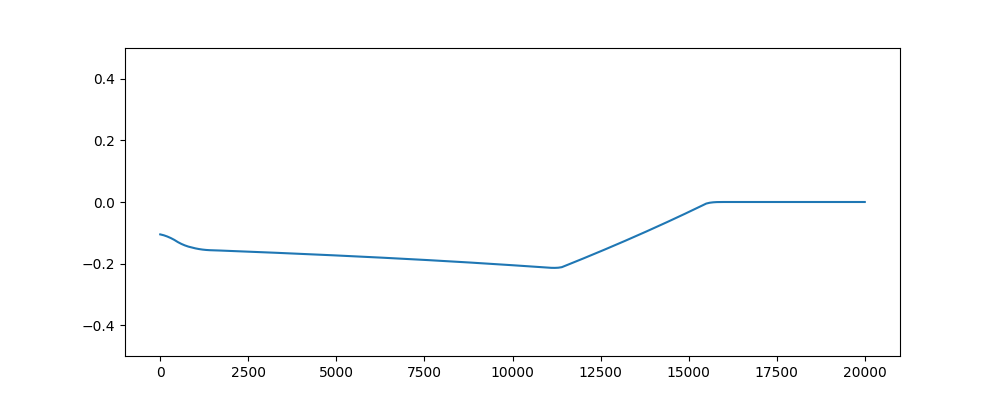

In [34]:
VRIVER = vr
def virtual_river(**kwargs):
    localvr = VRIVER
    for i, (sec, value) in enumerate(kwargs.items()):
        SECTIONS[i] = value *0.025 + 0.03 
    
    
    newfric = np.interp(vr.grid.chainage, vr.grid.samples.X.T[0], np.dot(SECTIONS, CV))

    vr.grid.friction[:] = np.tile(newfric, (len(vr.grid.time), 1))
    
    vr.run(timesteps=[vr.grid.time[0]])

    fig, ax = plt.subplots(1, figsize=(10, 4))
    ax.plot(vr.grid.chainage, vr.output.waterlevel.iloc[0, :]-BASELINE)
    ax.set_ylim([-0.5, 0.5])

    
virtual_river()

In [31]:
interactive_sections = OrderedDict()
for i in range(20):
    interactive_sections["section{:02d}".format(i)] = IntSlider(min=0,
                                                                max=4, 
                                                                continuous_update=False, 
                                                                description='Section {}'.format(i+1), 
                                                                )

# Water manager sections
for i in [5, 10, 11, 14]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'cadetblue'

# Eco-manager sections
for i in [1, 3, 7, 8, 12, 15]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'forestgreen'

# Provincial manager
for i in [2, 4, 6, 9, 13, 16]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'crimson'

# Inactive
for i in [17, 18, 19]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'azure'

# Riverbed
for i in [20]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'hotpink'
    
# Create gridded button interface
left_column = list()
right_column = list()

for i in range(10):
    left_column.append(interactive_sections["section{:02d}".format(i)])
    right_column.append(interactive_sections["section{:02d}".format(i+10)])

ui = HBox([VBox(left_column), VBox(right_column)])

out = interactive_output(virtual_river, interactive_sections)
display(ui, out)

HBox(children=(VBox(children=(IntSlider(value=0, continuous_update=False, description='Section 1', max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 2', max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 3', max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 4', max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 5', max=4, style=SliderStyle(handle_color='cadetblue')), IntSlider(value=0, continuous_update=False, description='Section 6', max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 7', max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 8', max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 9', max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 10', max=4, style=SliderStyle(handle_color='cadetblue')))), VBox(children=(IntSlider(value=0, continuous_update=False, description='Section 11', max=4, style=SliderStyle(handle_color='cadetblue')), IntSlider(value=0, continuous_update=False, description='Section 12', max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 13', max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 14', max=4, style=SliderStyle(handle_color='cadetblue')), IntSlider(value=0, continuous_update=False, description='Section 15', max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 16', max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 17', max=4, style=SliderStyle(handle_color='azure')), IntSlider(value=0, continuous_update=False, description='Section 18', max=4, style=SliderStyle(handle_color='azure')), IntSlider(value=0, continuous_update=False, description='Section 19', max=4, style=SliderStyle(handle_color='azure')), IntSlider(value=0, continuous_update=False, description='Section 20', max=4, style=SliderStyle(handle_color='hotpink'))))))

Output()